In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
rng = np.random

In [2]:
tf.__version__

'1.15.0'

In [3]:
hello = tf.constant('Hello World!')

In [4]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [5]:
with tf.Session() as sess:
    print(sess.run(hello))

b'Hello World!'


In [6]:
a = tf.constant(10)
b = tf.constant(3)

In [7]:
with tf.Session() as sess:
    print(sess.run(a))
    print(sess.run(a * b))

10
30


In [8]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [9]:
# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)

In [10]:
with tf.Session() as sess:
    print(sess.run(add, feed_dict={a: 40, b: 50}))

90


In [11]:
matrix1 = tf.constant([[2, 5], [5, 1]])
matrix2 = tf.constant([[1], [-2]])

In [12]:
matrix2.shape

TensorShape([Dimension(2), Dimension(1)])

In [13]:
prod = tf.matmul(matrix1, matrix2)

In [14]:
with tf.Session() as sess:
    result = sess.run(prod)
    print(result)

[[-8]
 [ 3]]


In [15]:


import tensorflow as tf



In [23]:
# Parameters
learning_rate = 10
training_epochs = 1000
display_step = 50

In [8]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

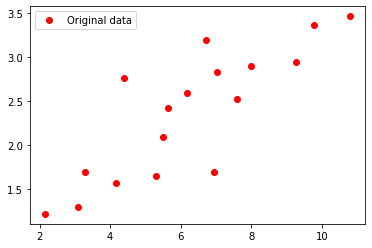

In [9]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [10]:
logs_path = '/tmp/tensorflow_logs/example/'
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

In [11]:
with tf.name_scope("Input"):
    X = tf.placeholder('float', name="feature")
    Y = tf.placeholder('float', name="target")

In [12]:
with tf.name_scope("Parameters"):
    W = tf.Variable(rng.randn(), name="weight")
    b = tf.Variable(rng.randn(), name="bias")

In [13]:
with tf.name_scope("LinearRegression"):
    pred = tf.add(tf.multiply(X,W), b)

In [14]:
with tf.name_scope("Loss"):
    loss = tf.reduce_sum(tf.pow(pred - Y, 2)/(2*n_samples))
with tf.name_scope("SGD"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
init = tf.global_variables_initializer()
logs_path = '/tmp/tensorflow_logs/example/'
tf.summary.scalar("loss", loss)
merged_summary_op = tf.summary.merge_all()

Epoch: 0050 cost= 0.148113459 W= 0.20833257 b= 0.7050892
Epoch: 0100 cost= 0.141582340 W= 0.18802732 b= 0.86770856
Epoch: 0150 cost= 0.141071841 W= 0.18574849 b= 0.8859594
Epoch: 0200 cost= 0.141017407 W= 0.1854927 b= 0.8880078
Epoch: 0250 cost= 0.141011253 W= 0.18546401 b= 0.8882377
Epoch: 0300 cost= 0.141010612 W= 0.18546079 b= 0.88826346
Epoch: 0350 cost= 0.141010582 W= 0.18546051 b= 0.88826567
Epoch: 0400 cost= 0.141010582 W= 0.18546051 b= 0.88826567
Epoch: 0450 cost= 0.141010582 W= 0.18546051 b= 0.88826567
Epoch: 0500 cost= 0.141010582 W= 0.18546051 b= 0.88826567
Epoch: 0550 cost= 0.141010582 W= 0.18546051 b= 0.88826567
Epoch: 0600 cost= 0.141010582 W= 0.18546051 b= 0.88826567
Epoch: 0650 cost= 0.141010582 W= 0.18546051 b= 0.88826567
Epoch: 0700 cost= 0.141010582 W= 0.18546051 b= 0.88826567
Epoch: 0750 cost= 0.141010582 W= 0.18546051 b= 0.88826567
Epoch: 0800 cost= 0.141010582 W= 0.18546051 b= 0.88826567
Epoch: 0850 cost= 0.141010582 W= 0.18546051 b= 0.88826567
Epoch: 0900 cost= 0

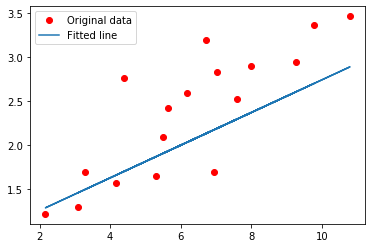

In [26]:
with tf.Session() as sess:
    sess.run(init)
     # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c, summary = sess.run([loss, merged_summary_op], feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
            summary_writer.add_summary(summary, epoch)
    training_cost = sess.run(loss, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [28]:
train_X = np.array(np.random.randint(low=1, high=20, size=1000))
train_Y = np.array((X * 50 + 50))

NotImplementedError: Cannot convert a symbolic Tensor (add_1:0) to a numpy array.